# RIM One Mark 2

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rm = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_rm.png')
rm_rgb = cv2.cvtColor(rm, cv2.COLOR_BGR2RGB)
rm_res = cv2.resize(rm_rgb, (int(rm_rgb.shape[1]*50/100), int(rm_rgb.shape[0]*50/100)), cv2.INTER_AREA)

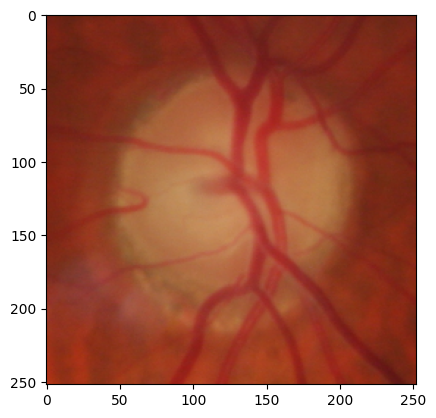

In [4]:
plt.imshow(rm_res)

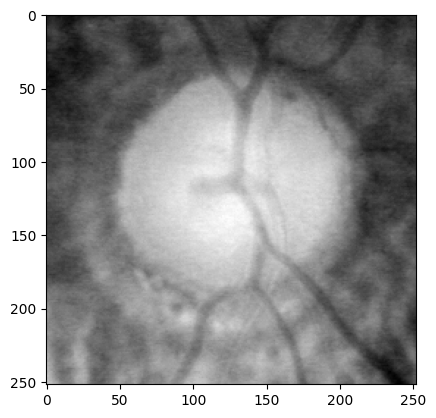

In [7]:
plt.imshow(rm_res[:,:,0], cmap='gray')

In [8]:
red = rm_res[:,:,0]

In [9]:
clahe = cv2.createCLAHE(2, (8,8))
redcl = clahe.apply(red.copy())

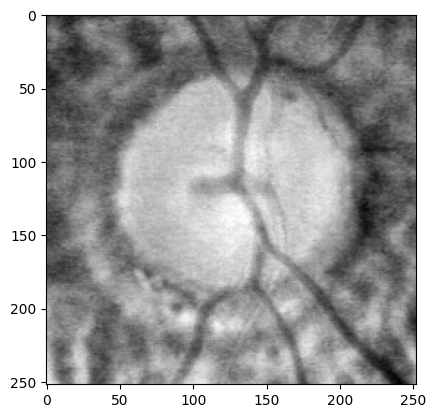

In [11]:
plt.imshow(redcl, cmap='gray')

In [33]:
redbl = cv2.GaussianBlur(redcl.copy(),(15,15), 0)

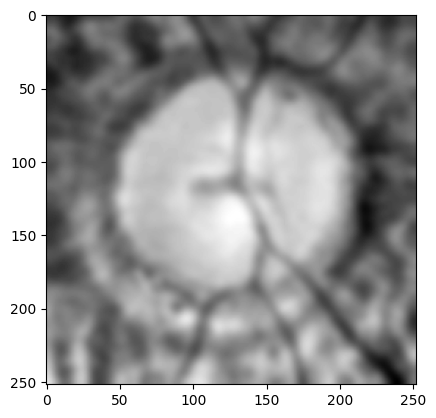

In [34]:
plt.imshow(redbl, 'gray')

In [35]:
dilated = cv2.dilate(redbl.copy(), kernel=np.ones((7,7), np.uint8), iterations=1)

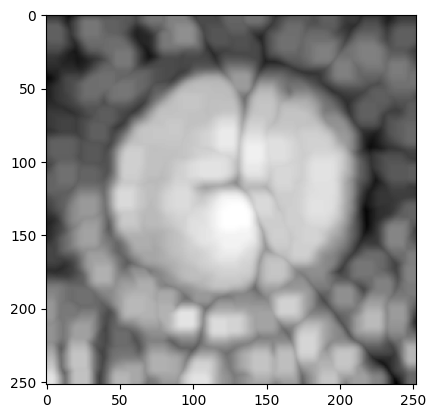

In [36]:
plt.imshow(dilated, cmap='gray')

In [37]:
eroded = cv2.erode(dilated.copy(), kernel=np.ones((7,7), np.uint8), iterations=1)

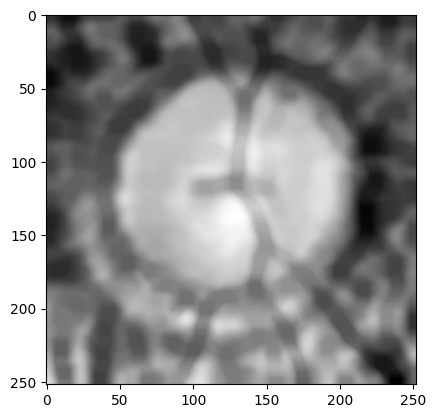

In [38]:
plt.imshow(eroded, cmap='gray')

In [39]:
green = rm_res[:,:,1]

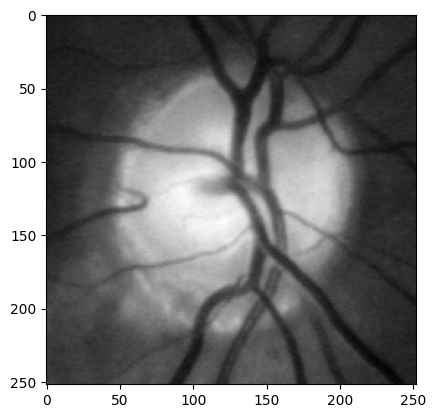

In [40]:
plt.imshow(green, 'gray')

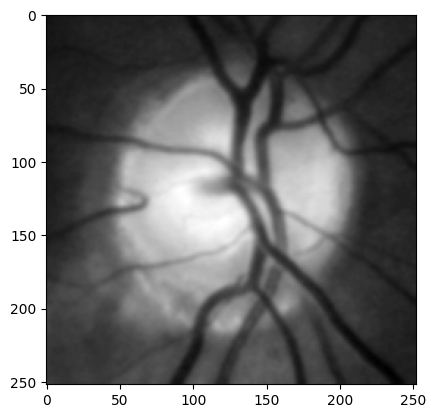

In [52]:
blur = cv2.GaussianBlur(green,(5,5),0)
plt.imshow(blur, cmap='gray')

In [44]:
ret3,th3 = cv2.threshold(blur.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

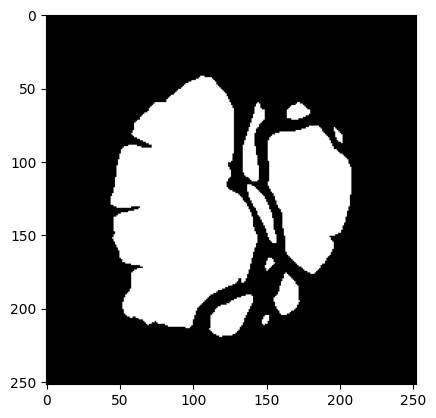

In [46]:
plt.imshow(th3, 'gray')

In [47]:
contours, hierarchy = cv2.findContours(th3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

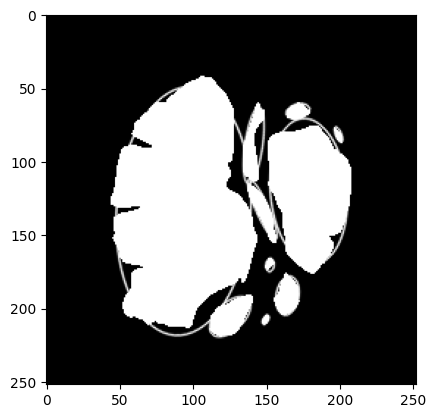

In [51]:
thh = th3.copy()
for contour in contours:
    ellipse = cv2.fitEllipse(contour)
    cv2.ellipse(thh, ellipse, (255, 0, 0), 1, cv2.LINE_AA)
    plt.imshow(thh, 'gray')